In [ ]:
pip install brokenaxes

In [6]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load Data

In [8]:
# Weight : 4 , Max_pressure : 6 , Max_deformation : 7 , Young : 8

data = pd.read_csv(file_path, header=None)
infill_type = list(data.iloc[:, 0].unique())

weight, yield_stress, yield_strain, young = [], [], [], []

for i in infill_type:

    current_data = data[data.iloc[:, 0] == i]

    weight.append(current_data.iloc[:, 4].tolist())
    yield_stress.append(current_data.iloc[:, 6].tolist())
    yield_strain.append(current_data.iloc[:, 7].tolist())
    young.append(current_data.iloc[:, 8].tolist())

datas = [weight, yield_stress, yield_strain, young]

file_path = "/home/corn/Documents/ScienceFair/Test1/TatalData.csv"

data = {}

with open(file_path, newline='', encoding='utf-8') as csvfile:

    rows = csv.reader(csvfile)

    # Read

    for row in rows:

        infill_name = row[0]

        if not infill_name in data:
            data[infill_name] = {}
            data[infill_name]["Prepare"] = [row[1]]
            data[infill_name]["Use"] = [row[2]]
            data[infill_name]["Print_time"] = [float(row[3])]
            data[infill_name]["Used_stuff"] = [float(row[5])]
            data[infill_name]["Weight"] = [float(row[4])]
            data[infill_name]["Max_pressure"] = [float(row[6])/1600]
            data[infill_name]["Max_deformation"] = [float(row[7])]
            data[infill_name]["Young"] = [float(row[8])]
        
        else:
            data[infill_name]["Print_time"].append(float(row[3]))
            data[infill_name]["Used_stuff"].append(float(row[5]))
            data[infill_name]["Weight"].append(float(row[4]))
            data[infill_name]["Max_pressure"].append(float(row[6])/1600)
            data[infill_name]["Max_deformation"].append(float(row[7]))
            data[infill_name]["Young"].append(float(row[8]))

Choose Test Type

In [9]:
test_type = "Weight" # "Print_time", "Used_stuff", "Weight", "Max_pressure", "Max_deformation", "Young"

d = [(key, np.average(value[test_type])) for key, value in data.items()]

d.sort(key=lambda x: x[1], reverse=True)

keys, values = zip(*d)

Output Image

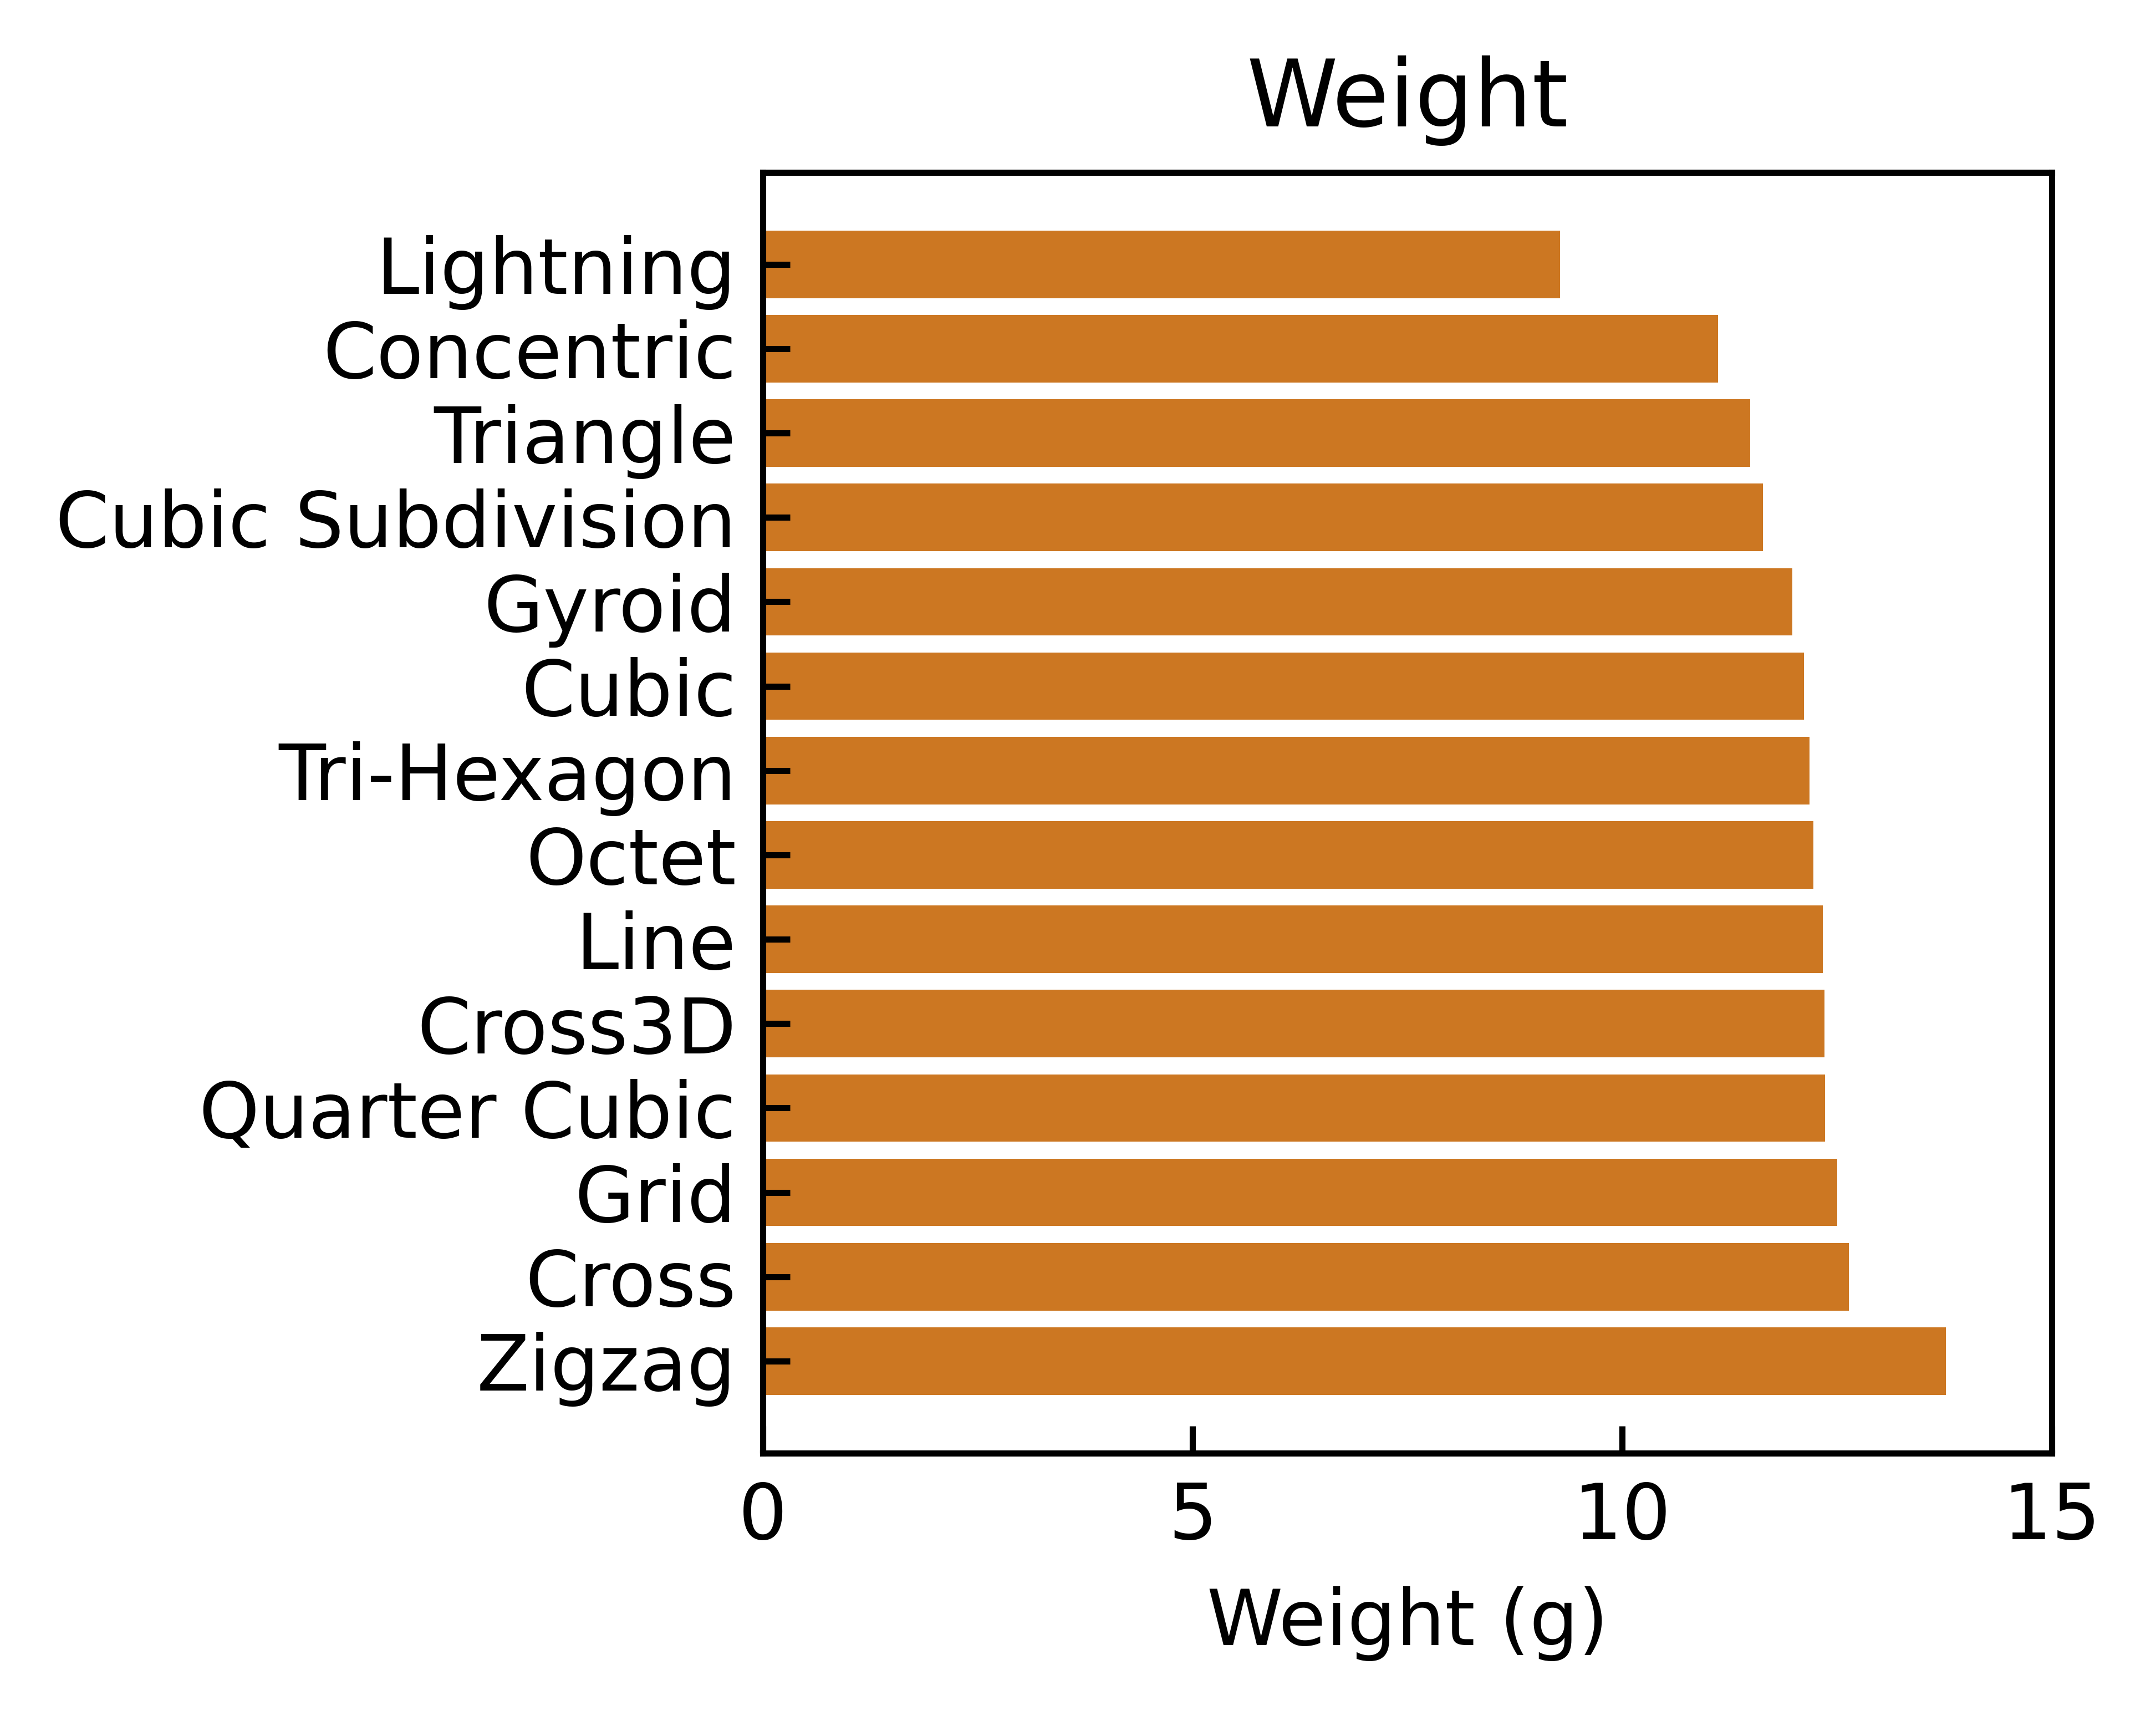

In [10]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(3, 3), dpi=1000)

plt.barh(keys, values, color=(0.8, 0.467, 0.133))

plt.xlim(0, 15)
plt.xlabel("Weight (g)")
plt.title("Weight")

plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

plt.show()